## SF2935 Modern methods of statistical learning on KTH
### Project 1
#### By Hannes Kindbom and Viktor Reineck


In [131]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [132]:
#Read data
df = pd.read_csv("Auto_dataset.csv")

## Part 1

In [134]:
#Modify
median_mpg = df["mpg"].median()
df["mpg"] = (df["mpg"] > median_mpg).astype(int)
#drop non-numeric data
df = df[df.horsepower.apply(lambda datapoint: datapoint.isnumeric())]
#convert horsepower data to ints
df["horsepower"]  = pd.to_numeric(df["horsepower"])

df.head(15)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,0,8,302.0,140,3449,10.5,70,1,ford torino
5,0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


### Graphical Analysis

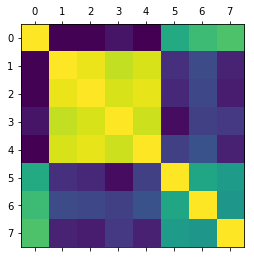

In [135]:
#correlation plot
corr_matrix = df.corr()

#postive = yellow and negative = blue
plt.matshow(corr_matrix)
plt.show()

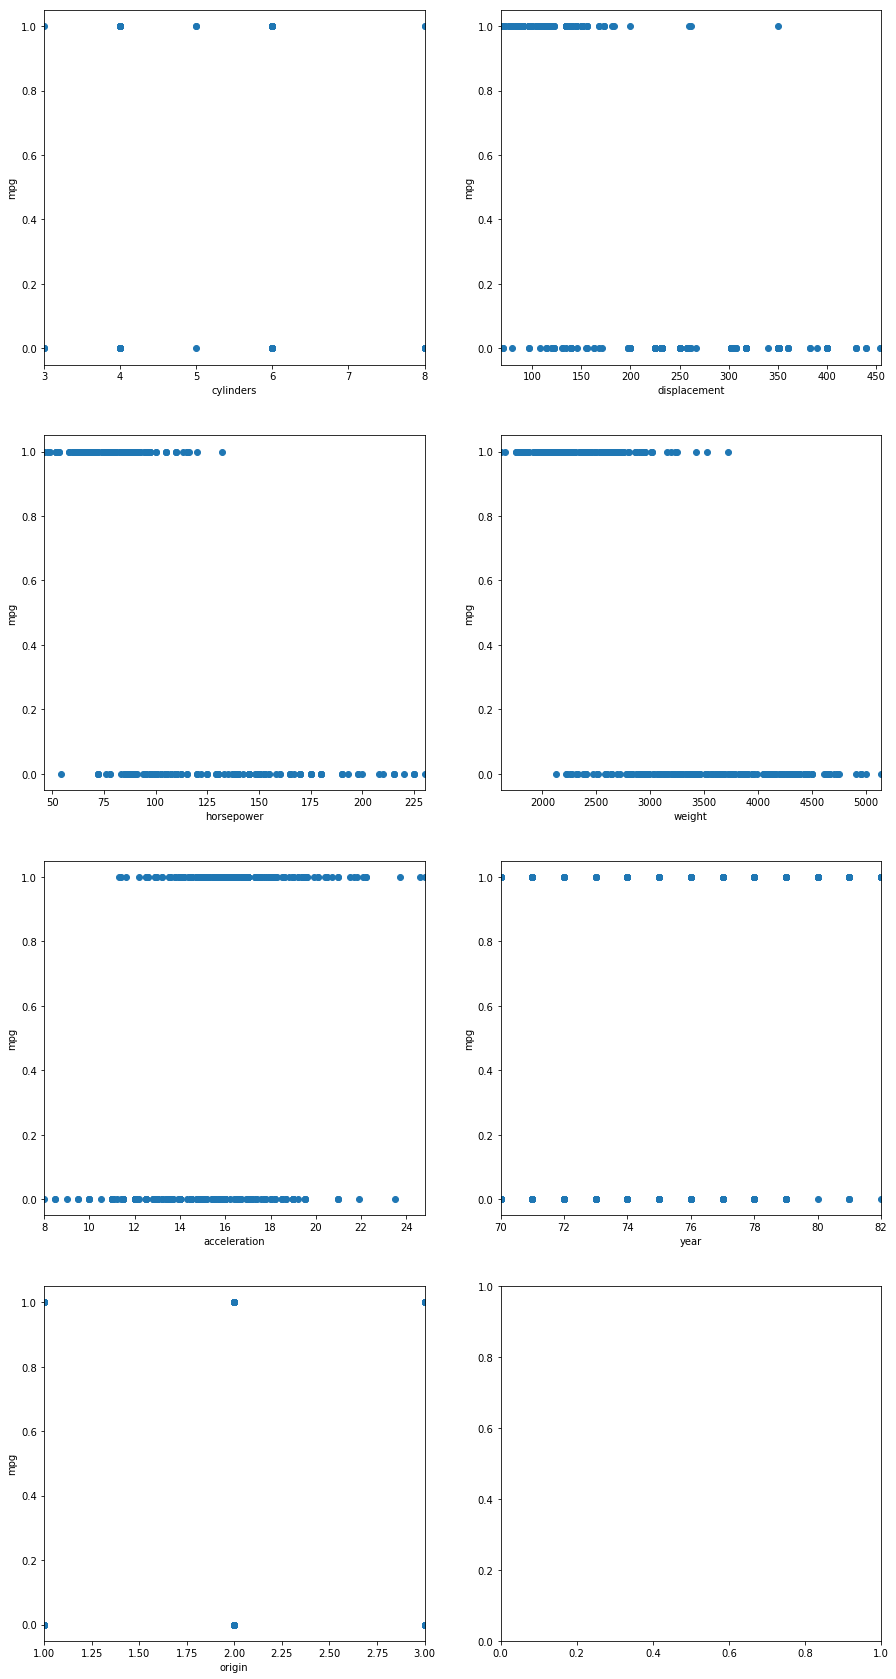

In [136]:
#scatterplots
fig, axes = plt.subplots(4,2) 
columns = df.columns.tolist()
fig.set_figheight(30)
fig.set_figwidth(15)

columns.remove("name")
columns.remove("mpg")

for idx, col in enumerate(columns):
    df.plot(x=col, y="mpg", style="o", ax = axes.flatten()[idx], legend=False)
    axes.flatten()[idx].set_ylabel("mpg")
    

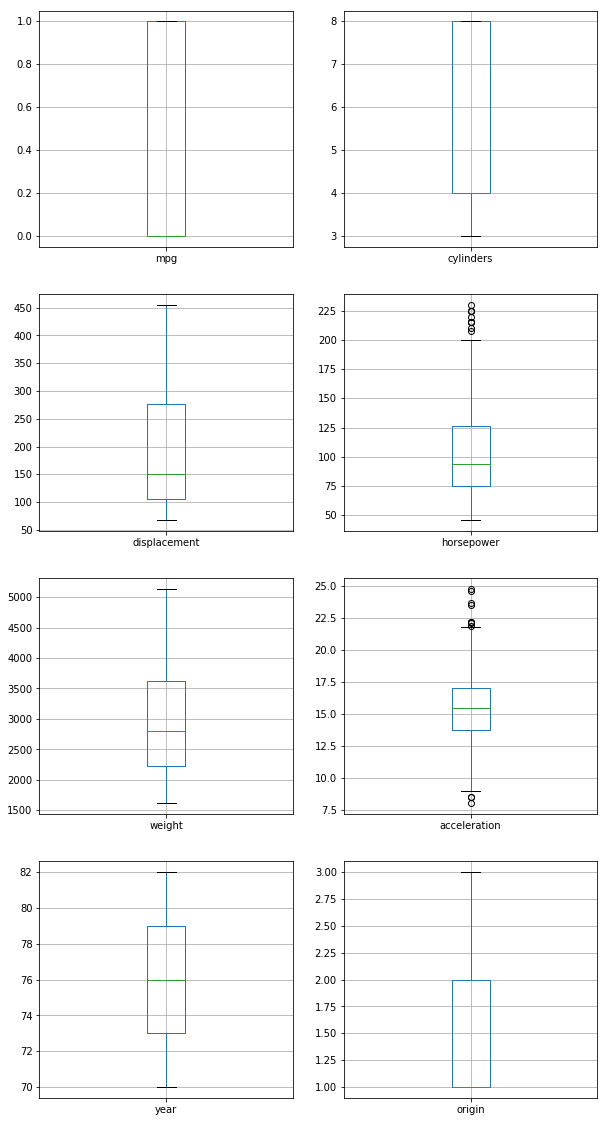

In [137]:
#Boxplots
fig, axes = plt.subplots(4,2)
columns = df.columns.tolist()
fig.set_figheight(20)
fig.set_figwidth(10)

columns.remove("name")

for idx, col in enumerate(columns):
    df.boxplot(column=col, ax = axes.flatten()[idx])

## Prepare dataframe for learning

In [139]:
#Function to analyse test train split
def get_error(clf, df, test_size):
    train_df, test_df = train_test_split(df, test_size=test_size, random_state=0)
    
    #column 1 to 4 are the chosen features and column 0 is the response (mpg)
    X_train = train_df.iloc[:, 1:4].values
    Y_train = train_df.iloc[:, 0].values

    X_test = test_df.iloc[:, 1:4].values
    Y_test = test_df.iloc[:, 0].values
    
    clf.fit(X_train,Y_train)
    training_error = 1 - clf.score(X_train,Y_train)
    test_error = 1 - clf.score(X_test,Y_test)
    
    return training_error, test_error


In [140]:
#plot errors and function of test sizes for a classifier
def plot_errors_for_test_sizes(clf, df, test_sizes):
    training_errors = []
    test_errors = []
   
    for test_size in test_sizes:
        training_error, test_error = get_error(clf, df, test_size)
        training_errors.append(training_error)
        test_errors.append(test_error)
    
    plt.figure(figsize=(12, 8))
    plt.plot(test_sizes, test_errors, 'r',label = "Test Error")
    plt.plot(test_sizes, training_errors, 'b',label = "Training Error")
    plt.legend(loc="upper right")
    plt.title("Analysis of Test Size: ")

    plt.ylabel('Errors')
    plt.xlabel('Test Size')
    plt.show()


In [141]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=0)
#column 1 to 4 are the chosen features and column 0 is the response (mpg)
X_train = train_df.iloc[:, 1:4].values
Y_train = train_df.iloc[:, 0].values

X_test = test_df.iloc[:, 1:4].values
Y_test = test_df.iloc[:, 0].values

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)


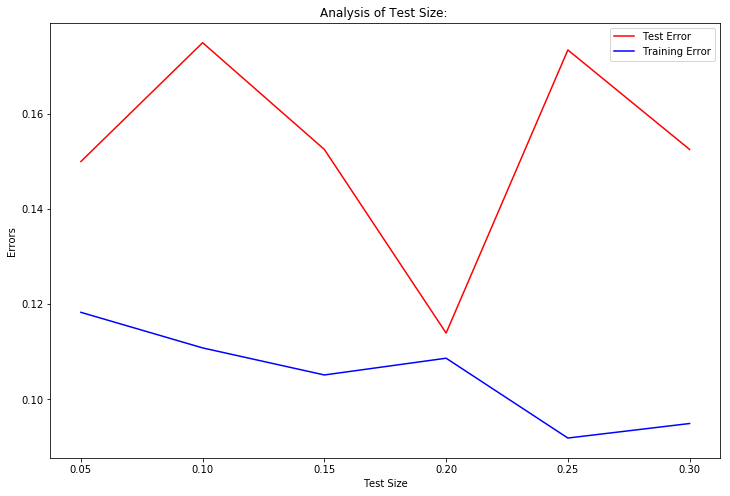

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)


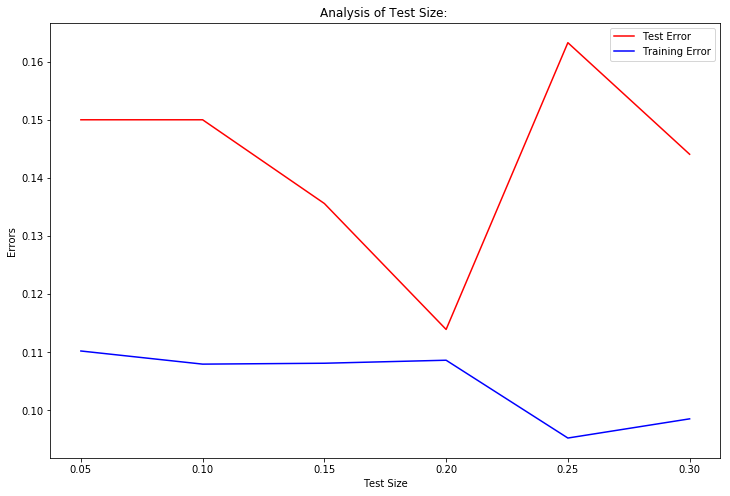

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


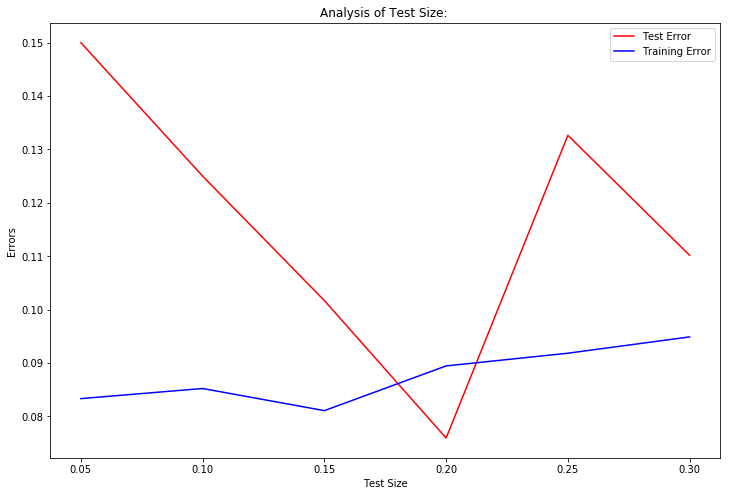

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


/home/hannes/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/hannes/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/hannes/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/hannes/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/hannes/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

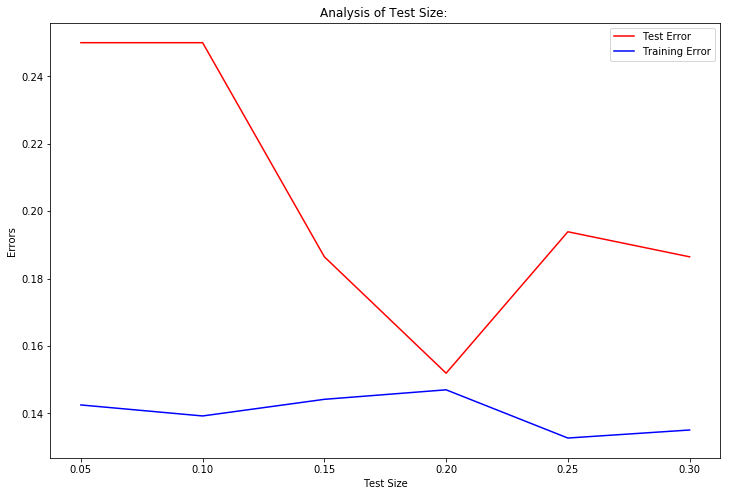

In [143]:
k = 5
test_sizes = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]

LDA_clf = LinearDiscriminantAnalysis()
QDA_clf = QuadraticDiscriminantAnalysis()
KNN_clf = KNeighborsClassifier(n_neighbors=k)
LogReg_clf = LogisticRegression()

clfs = [LDA_clf, QDA_clf, KNN_clf, LogReg_clf]

for clf in clfs:
    print(clf)
    plot_errors_for_test_sizes(clf, df, test_sizes)



### Analysis of k-value in KNN

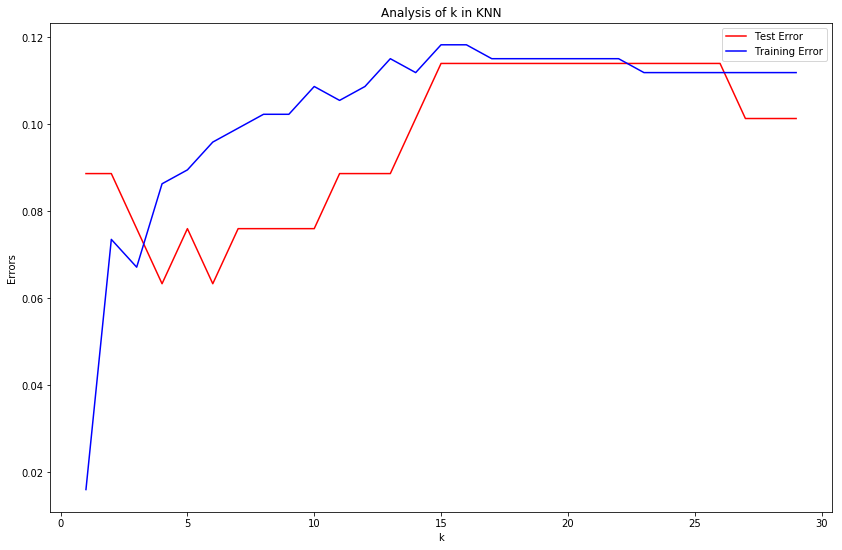

In [29]:
ks = range(1,30)
training_error = []
test_error = []

for k in ks:
    KNN_clf = KNeighborsClassifier(n_neighbors=k)
    KNN_clf.fit(X_train,Y_train)
    training_error.append(1-KNN_clf.score(X_train,Y_train))
    test_error.append(1-KNN_clf.score(X_test,Y_test))


plt.figure(figsize=(14, 9))
plt.plot(ks, test_error, 'r',label = "Test Error")
plt.plot(ks, training_error, 'b',label = "Training Error")
plt.legend(loc="upper right")
plt.title("Analysis of k in KNN")

plt.ylabel('Errors')
plt.xlabel('k')

plt.show()

## Part 2 - Using Simulated Data

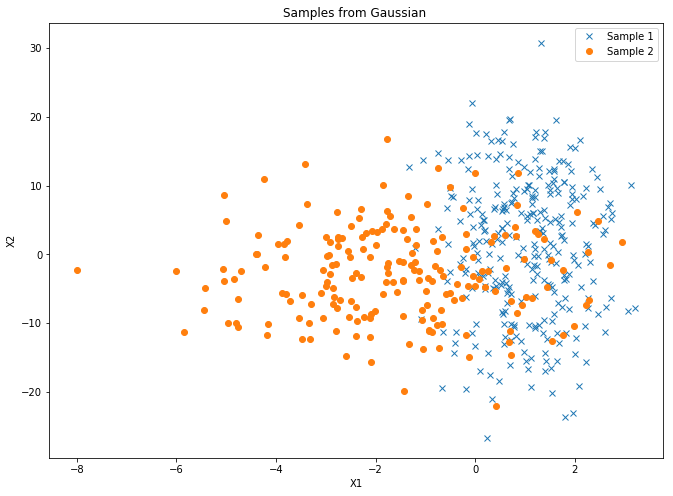

In [70]:
#Sampe from Gaussian
N = 500
M = 300
mean = [1, 1]
cov = [[1, 0], [0, 100]]  # diagonal covariance

mean_ = [-2, -2]
cov_ = [[4, 0], [0, 40]]  # diagonal covariance

X1, X2 = np.random.multivariate_normal(mean, cov, M).T
X1_, X2_ = np.random.multivariate_normal(mean_, cov_, N-M).T

plt.figure(figsize=(11, 8))
plt.plot(X1, X2, 'x',label = "Sample 1")
plt.plot(X1_, X2_, 'o',label = "Sample 2")
plt.legend(loc="upper right")
plt.title("Samples from Gaussian ")
plt.ylabel('X2')
plt.xlabel('X1')
plt.show()

In [144]:
# Put data in dataframes
labels = np.full((X1.size), 1, dtype=int) 
generated_df = pd.DataFrame({'labels': labels, 'X1': X1, 'X2': X2})

labels_ = np.full((X1_.size), -1, dtype=int) 
generated_df_ = pd.DataFrame({'labels': labels_, 'X1': X1_, 'X2': X2_})

### Merge dataframes

In [72]:
tot_df = generated_df.append(generated_df_)
tot_df.head()

,labels,X1,X2
0,1,2.453084,11.208057
1,1,1.211084,-10.681462
2,1,0.681157,14.150961
3,1,1.498042,9.279154
4,1,0.212078,17.502240


## Train models and predict

In [90]:
def get_test_error_sampling(df, test_size):
    
    LDA_clf = LinearDiscriminantAnalysis()
    QDA_clf = QuadraticDiscriminantAnalysis()
    LogReg_clf = LogisticRegression()

    training_error, test_error = get_error(LDA_clf, df, test_size)
    print(test_error)

    training_error, test_error = get_error(QDA_clf, df, test_size)
    print(test_error)

    training_error, test_error = get_error(LogReg_clf, df, test_size)
    print(test_error)


## Now with mixed distributions

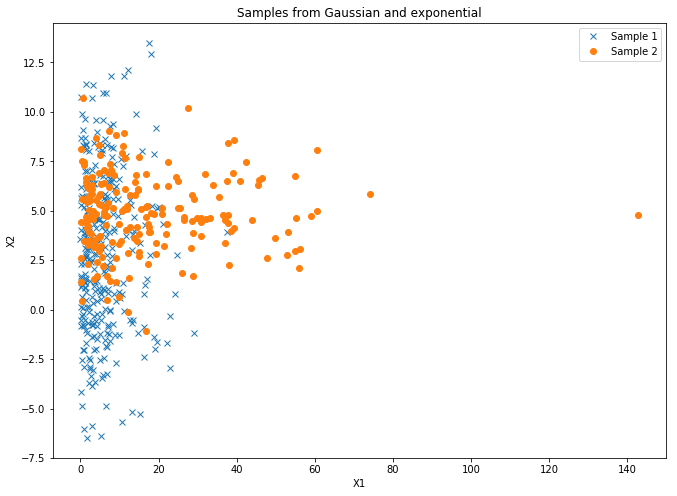

In [145]:
#Sampe from Gaussian and exponential

#For Gaussian
mean = 3
sigma = 4
mean_ = 5
sigma_ = 2
X2 = np.random.normal(mean, sigma, M)
X2_ = np.random.normal(mean_, sigma_, N-M)

#For exponential
beta = 6
beta_ = 20
X1 = np.random.exponential(beta, M)
X1_ = np.random.exponential(beta_, N-M)


plt.figure(figsize=(11, 8))
plt.plot(X1, X2, 'x',label = "Sample 1")
plt.plot(X1_, X2_, 'o',label = "Sample 2")
plt.legend(loc="upper right")
plt.title("Samples from Gaussian and exponential")
plt.ylabel('X2')
plt.xlabel('X1')
plt.show()

In [97]:
# Put in dataframes
labels = np.full((X1.size), 1, dtype=int) 
mixed_generated_df = pd.DataFrame({'labels': labels, 'X1': X1, 'X2': X2})

labels_ = np.full((X1_.size), -1, dtype=int) 
mixed_generated_df_ = pd.DataFrame({'labels': labels_, 'X1': X1_, 'X2': X2_})

In [98]:
mixed_tot_df = mixed_generated_df.append(mixed_generated_df_)
mixed_tot_df.head()

,labels,X1,X2
0,1,6.929976,5.986045
1,1,1.819731,0.885637
2,1,3.887654,-1.500170
3,1,3.919359,5.781589
4,1,2.681138,4.816615


In [99]:
test_size = 0.2
get_test_error_sampling(mixed_tot_df, test_size)

0.25
0.22999999999999998
0.24


/home/hannes/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Now mixed without Gaussian

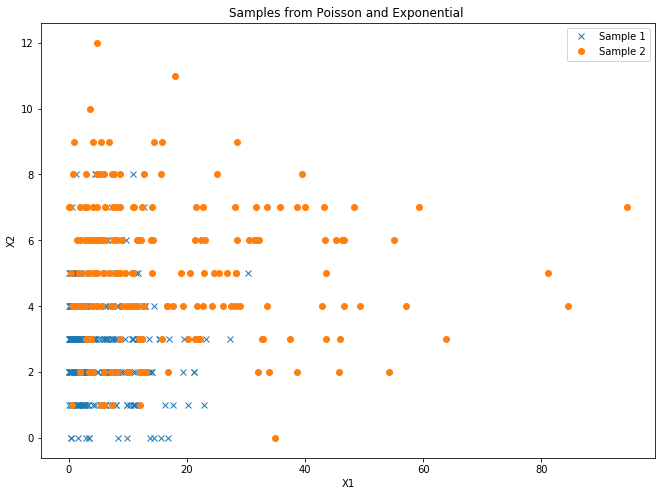

In [147]:
#Sampe from Poisson and exponential

#Poisson
mu = 3
mu_ = 5
X2 = np.random.poisson(mu, M)
X2_ = np.random.poisson(mu_, N-M)

#Exponential
beta = 6
beta_ = 20
X1 = np.random.exponential(beta, M)
X1_ = np.random.exponential(beta_, N-M)


plt.figure(figsize=(11, 8))
plt.plot(X1, X2, 'x',label = "Sample 1")
plt.plot(X1_, X2_, 'o',label = "Sample 2")
plt.legend(loc="upper right")
plt.title("Samples from Poisson and Exponential ")
plt.ylabel('X2')
plt.xlabel('X1')
plt.show()

In [148]:
# Put in dataframes
labels = np.full((X1.size), 1, dtype=int) 
no_gauss_mixed_generated_df = pd.DataFrame({'labels': labels, 'X1': X1, 'X2': X2})

labels_ = np.full((X1_.size), -1, dtype=int) 
no_gauss_mixed_generated_df_ = pd.DataFrame({'labels': labels_, 'X1': X1_, 'X2': X2_})

In [149]:
no_gauss_mixed_tot_df = no_gauss_mixed_generated_df.append(no_gauss_mixed_generated_df_)
no_gauss_mixed_tot_df.head()

,labels,X1,X2
0,1,4.690668,8
1,1,1.134908,3
2,1,10.258308,5
3,1,0.848907,3
4,1,2.672769,6


In [150]:
test_size = 0.2
get_test_error_sampling(no_gauss_mixed_tot_df, test_size)

0.17000000000000004
0.22999999999999998
0.18000000000000005


/home/hannes/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
